# Flights Data Exploration
## by Blake Osborn

## Preliminary Wrangling

> The data set I'm going to examine contains flight arrival and departure details from 2006 through 2008.  I'm specifically going to focus on flights that originate from O'Hare International Airport because it's local to me and I'm curious to examine flight delays for the airport.

In [122]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import os
from time import time

%matplotlib inline

### List Functions

In [123]:
def StripPlot(df, xVar, yVar, color = None):
    # plot
    sb.stripplot(data = df, x = xVar, y = yVar, jitter = 0.35, color = color)
    
    #Titles and Labels
    plt.title(f"{yVar} and {xVar}".title(), fontsize = 14, weight = 'bold')
    plt.xlabel(xVar.title())
    plt.ylabel(f"{yVar} (min)".title())

In [124]:
# Exports .csv to working directory
def fun_csv_export(df, ex_name):
    path = './'
    
    name = '\{}.csv'.format(ex_name)
    df.to_csv(path + name, index = False)

### Import data from .csv files

In [125]:
# Import flights details for 2006, 2007, and 2008
path = r'.\Flight_Data'
all_files = glob.glob(os.path.join(path, "*.csv"))

df_flights = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

### Limit data frame to delayed flights originating from O'Hare

In [126]:
# Limit to flights originating at O'Hare
# This df is used to calc % of delays by carrier
df_flights = df_flights.query('Origin == "ORD"').copy()

# Set up df that contains data for delayed flights only
df_flights_delayed = df_flights.query('DepDelay > 0').copy()

### Remove columns that will not be used in analysis

In [127]:
df_flights_delayed.drop(['ArrTime', 'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime'
                 , 'ArrDelay', 'TaxiIn', 'TaxiOut', 'Diverted'], axis=1, inplace=True)

### Examine the data 

In [128]:
df_flights_delayed.shape

(521194, 20)

In [129]:
df_flights_delayed.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,UniqueCarrier,FlightNum,TailNum,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
838,2006,1,11,3,1225.0,1210,US,396,N588US,15.0,ORD,CLT,599,0,NaN,0.0,0.0,0.0,0.0,0.0
839,2006,1,11,3,1835.0,1740,US,461,N511AU,55.0,ORD,CLT,599,0,NaN,1.0,0.0,0.0,0.0,54.0
840,2006,1,11,3,1645.0,1540,US,1064,N393US,65.0,ORD,CLT,599,0,NaN,10.0,0.0,0.0,0.0,47.0
843,2006,1,11,3,1505.0,1500,US,605,N633AW,5.0,ORD,LAS,1515,0,NaN,0.0,0.0,0.0,0.0,0.0
844,2006,1,11,3,846.0,835,US,723,N667AW,11.0,ORD,LAS,1515,0,NaN,0.0,0.0,0.0,0.0,0.0


In [130]:
df_flights_delayed.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
Cancelled              int64
CancellationCode      object
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [131]:
df_flights_delayed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 521194 entries, 838 to 21603154
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               521194 non-null  int64  
 1   Month              521194 non-null  int64  
 2   DayofMonth         521194 non-null  int64  
 3   DayOfWeek          521194 non-null  int64  
 4   DepTime            521194 non-null  float64
 5   CRSDepTime         521194 non-null  int64  
 6   UniqueCarrier      521194 non-null  object 
 7   FlightNum          521194 non-null  int64  
 8   TailNum            521194 non-null  object 
 9   DepDelay           521194 non-null  float64
 10  Origin             521194 non-null  object 
 11  Dest               521194 non-null  object 
 12  Distance           521194 non-null  int64  
 13  Cancelled          521194 non-null  int64  
 14  CancellationCode   91 non-null      object 
 15  CarrierDelay       456464 non-null  float64
 16

In [132]:
df_flights_delayed.nunique()

Year                    3
Month                  12
DayofMonth             31
DayOfWeek               7
DepTime              1312
CRSDepTime           1009
UniqueCarrier          15
FlightNum            3472
TailNum              3699
DepDelay              562
Origin                  1
Dest                  157
Distance              152
Cancelled               2
CancellationCode        3
CarrierDelay          461
WeatherDelay          360
NASDelay              359
SecurityDelay          80
LateAircraftDelay     443
dtype: int64

In [133]:
df_flights_delayed.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,FlightNum,DepDelay,Distance,Cancelled,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,521194.000000,521194.00000,521194.000000,521194.000000,521194.000000,521194.000000,521194.000000,521194.000000,521194.000000,521194.000000,456464.000000,456464.000000,456464.000000,456464.000000,456464.000000
mean,2006.964781,6.33199,15.751726,3.932975,1513.778570,1460.130961,2914.838705,39.731793,729.000689,0.000175,11.680783,2.518930,8.097456,0.019134,21.869116
std,0.803589,3.47992,8.749485,1.995873,461.468244,433.128620,2355.090053,50.198834,530.938788,0.013212,29.306209,15.026695,21.957115,1.130187,42.315263
min,2006.000000,1.00000,1.000000,1.000000,1.000000,500.000000,1.000000,1.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,3.00000,8.000000,2.000000,1135.000000,1105.000000,722.000000,7.000000,316.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,6.00000,16.000000,4.000000,1544.000000,1510.000000,2003.000000,21.000000,612.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.000000,9.00000,23.000000,6.000000,1914.000000,1830.000000,4362.000000,54.000000,888.000000,0.000000,11.000000,0.000000,6.000000,0.000000,27.000000
max,2008.000000,12.00000,31.000000,7.000000,2400.000000,2310.000000,7499.000000,1345.000000,4243.000000,1.000000,1329.000000,985.000000,721.000000,224.000000,1012.000000


In [134]:
# Check for duplicate records
sum(df_flights_delayed.duplicated())

0

In [135]:
# Count of flights by carrier
df_flights_delayed['UniqueCarrier'].value_counts()

UA    140312
MQ    130982
AA    106458
OO     64861
YV     37620
US     11927
CO      7413
NW      6693
DL      5055
OH      2911
XE      2626
AS      2409
B6      1822
EV        93
9E        12
Name: UniqueCarrier, dtype: int64

In [136]:
# Determine % of departure traffic is by top 5 airlines

# UA = United Airlines
UA_cnt = len(df_flights_delayed.query('UniqueCarrier == "UA"'))

# MQ = Envoy Air
MQ_cnt = len(df_flights_delayed.query('UniqueCarrier == "MQ"'))

# AA = American Airlines
AA_cnt = len(df_flights_delayed.query('UniqueCarrier == "AA"'))

# OO = Skywest Airlines
OO_cnt = len(df_flights_delayed.query('UniqueCarrier == "OO"'))

# YV = Mesa Airlines
YV_cnt = len(df_flights_delayed.query('UniqueCarrier == "YV"'))

perc_data = (UA_cnt + MQ_cnt + AA_cnt + OO_cnt + YV_cnt) / len(df_flights_delayed.index) * 100

perc_data

92.14093024862143

United, Envoy, American, Skywest, and Mesa Airlines had the most flights depart from O'Hare from 2006 through 2008 and account for 91% of departure traffic.  It may make sense to limit observations to these five airlines at some point if it makes sense for visualizations.

In [137]:
# Determine earliest scheduled flight departure time
earliest_dep_time = df_flights_delayed['CRSDepTime'].min()
earliest_dep_time

500

In [138]:
# Determine latest scheduled flight departure time
latest_dep_time = df_flights_delayed['CRSDepTime'].max()
latest_dep_time

2310

In [139]:
# Create a new column named PeriodOfDay that categorizes scheduled departure times

# Start timer
t0 = time()

# Intervals
bins = [0 ,500, 900, 1300, 1700, 2100, 2400]

# Labels
labels = ['Redeye', 'Early Morning', 'Late Morning', 'Afternoon', 'Evening', 'Late Evening']

# pandas cut
df_flights_delayed['PeriodOfDay'] = pd.cut(df_flights_delayed['CRSDepTime'], bins, labels = labels)

# Time
vTime = time()-t0
print(f'Time Taken {vTime} seconds')

Time Taken 0.027788877487182617 seconds


In [140]:
# Show counts for newly created PeriodOfTime columns
df_flights_delayed['PeriodOfDay'].value_counts()

Evening          164536
Afternoon        151814
Late Morning     115045
Early Morning     65577
Late Evening      23961
Redeye              261
Name: PeriodOfDay, dtype: int64

In [141]:
# Export data to csv for manual review
fun_csv_export(df_flights_delayed, 'df_flights_delayed')

### What is the structure of your dataset?

> There are 521,194 records in the data set with 20 descriptive columns (21 after adding PeriodOfDay).  I've eliminated columns that concern flight arrival because I'm gong to focus on flight departures.

There are five columns that describe why flights were delayed 
- **CarrierDelay:** Caused by the air carrier
- **WeatherDelay:** Caused by inclement weather
- **NASDelay:** Caused by the NAS (National Airspace System)
- **SecurityDelay:** Caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas
- **LateAircraftDelay:** Caused by a delay in the arrival from an aircraft from another aiport


### What is/are the main feature(s) of interest in your dataset?

> I'm interested in determining what causes the lengthiest delays at O'Hare and the time of day and year a passenger is most likely to be delayed.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Having lived in the Chicago area for over 15 years, I suspect weather delays will lead to the lengthiest delays.  I expect to see a spike in delays during the winter months for weather, with other types of delays having a more even distribution throughout the year.  Logically, I would also expect delays to happen more frequently during peak travel hours.

> It's also possible some carriers have more delays than other, so I'll also take a look at this relationship

## Univariate Exploration

#### Examine distribution of delay lengths

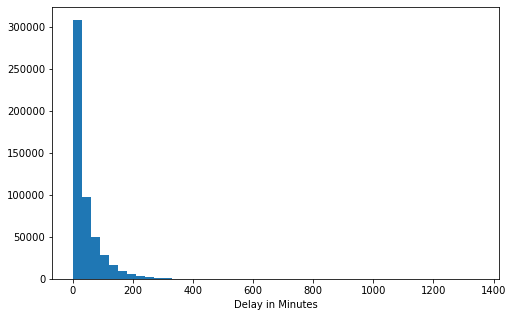

In [142]:
# start with a standard-scaled plot for delay time
binsize = 30
bins = np.arange(0, df_flights_delayed['DepDelay'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_flights_delayed, x = 'DepDelay', bins = bins)
plt.xlabel('Delay in Minutes')
plt.show()

#### Observation:
> Most data is shifted to left, suggesting outliers are skewing the data.  Apply a log scale in the next step to get a better picture

In [143]:
# Display stats for DepDelay column
df_flights_delayed['DepDelay'].describe()

count    521194.000000
mean         39.731793
std          50.198834
min           1.000000
25%           7.000000
50%          21.000000
75%          54.000000
max        1345.000000
Name: DepDelay, dtype: float64

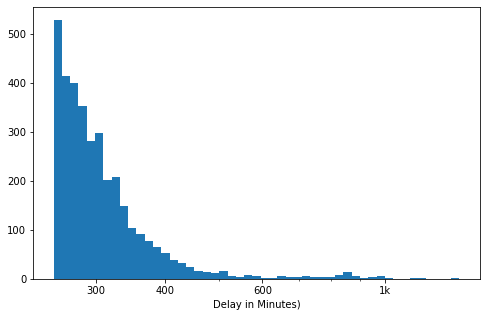

In [144]:
log_binsize = 0.015
bins = 10 ** np.arange(2.4, np.log10(df_flights_delayed['DepDelay'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_flights_delayed, x = 'DepDelay', bins = bins)
plt.xscale('log')
plt.xticks([3e2, 4e2, 6e2, 1000], [300, '400', '600', '1k'])
plt.xlabel('Delay in Minutes)')
plt.show()

#### Observation:
> After plotting the log scale we still see a left skew, which makes sense.  Most flight delays will probably be of a shorter duration and we would expect a fair amount with a moderate delay of a couple hours, with a few delays lasting several hours and longer.

### Lets take a look at which airlines had the most delays and airline percentage of flights delayed

#### Build data framed to chart percent delayed

In [145]:
# Get total flight count by Carrier
df_ttl_flights = df_flights['UniqueCarrier'].value_counts().to_frame().reset_index()
# Udpate Column Names
df_ttl_flights.columns = ['UniqueCarrier', 'FlightCount']

# Get total delayed flight count by Carrier
df_ttl_delays = df_flights_delayed['UniqueCarrier'].value_counts().to_frame().reset_index()
# Udpate Column Names
df_ttl_delays.columns = ['UniqueCarrier', 'DelayCount']

# Merge total flight & total delayed flight count dataframes
df_delay_pct = pd.merge(df_ttl_flights, df_ttl_delays, on=['UniqueCarrier'])

# Calculate % of flights delayed by carrier
df_delay_pct['DelayPct'] = df_delay_pct['DelayCount'] / df_delay_pct['FlightCount']

df_delay_pct

,UniqueCarrier,FlightCount,DelayCount,DelayPct
0,UA,278847,140312,0.503186
1,MQ,271500,130982,0.482438
2,AA,222624,106458,0.478196
3,OO,148603,64861,0.436472
4,YV,81186,37620,0.463380
5,US,23643,11927,0.504462
6,NW,21137,6693,0.316649
7,CO,15077,7413,0.491676
8,DL,11902,5055,0.424719
9,OH,8727,2911,0.333563


#### Display delay counts & delay percentage side-by-side

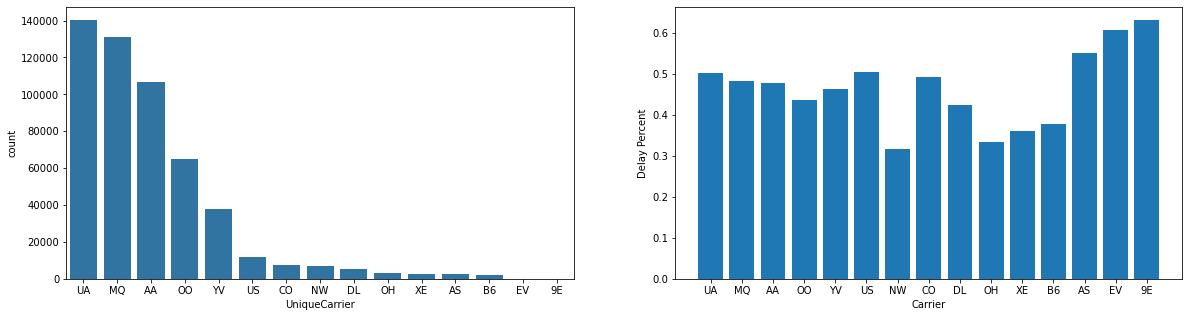

In [146]:
plt.figure(figsize = [20, 5])

# HISTOGRAM ON LEFT: Total flights by Carrier
plt.subplot(1, 2, 1)
base_color = sb.color_palette()[0]

carr_cnt = df_flights_delayed['UniqueCarrier'].value_counts()

# Get the indexes of the Series
carr_order = carr_cnt.index

# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
sb.countplot(data=df_flights_delayed, x='UniqueCarrier', color=base_color, order=carr_order);

# HISTOGRAM ON RIGHT: Percnt flights delayed by carrier
plt.subplot(1, 2, 2)

# Unique Carrier abbrev.
x = df_delay_pct['UniqueCarrier']

# Perct delayed flights by carrier
y = df_delay_pct['DelayPct']

plt.bar(x, y)

# Labeling the axes
plt.xlabel('Carrier')
plt.ylabel('Delay Percent')

# Dsiplay the plot
plt.show()

#### Observation:
> As expected, the five carriers with the most departures from O'Hare have highest number of delayed flights.  However, the carriers with the highest percent of delayed flights are the 3 carriers with the fewest flight departures from O'Hare - AS (Alaskan Airlines), EV (ExpressJet), and 9E (Endeavor Air)

#### Plot distribution of the five types of delays

144982 CarrierDelay delays
33041 WeatherDelay delays
150144 NASDelay delays
297 SecurityDelay delays
183678 LateAircraftDelay delays


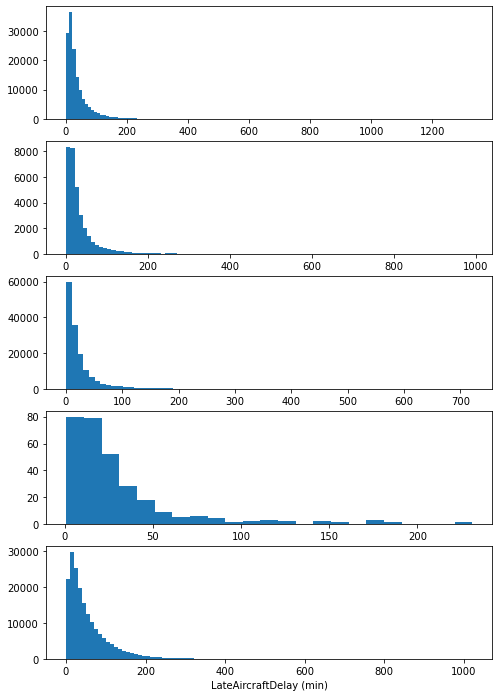

In [147]:
# Plot distribution of each type of delay
fig, ax = plt.subplots(nrows=5, figsize = [8,12])

variables = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
for i in range(len(variables)):
    var = variables[i]
    df_var = df_flights_delayed[df_flights_delayed[var] > 0]
    qty_del = len(df_var)
    bins = np.arange(min(df_var[var]), max(df_var[var])+10, 10)
    ax[i].hist(data = df_var, x = var, bins = bins)
    ax[i].set_xlabel('{} (min)'.format(var))
    print('{} {} delays'.format(qty_del, var))

plt.show()
#print('Qty {} delays'.format(var))

#### Observation:
> Fist, when reviewing these plots attention needs to be paid to the x axis.  The max delay is highly variable amongst the different types of delays.

Plotting the different types of delays tells a few things:
1. Carrier, Weather, and Late Aircraft had the longest delays, noticeable by the extreme tails to the right.  However, these long delays didn't happen often.
2. Late Aircraft, Weather, and Carrier delays happened the most often.
3. Security caused the fewest delays by a significant amount.

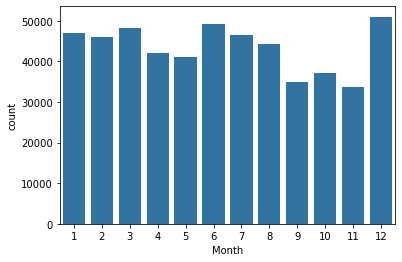

In [148]:
# Plot delays by month
sb.countplot(data=df_flights_delayed, x='Month', color=base_color);

#### Take a look at counts of delays by month

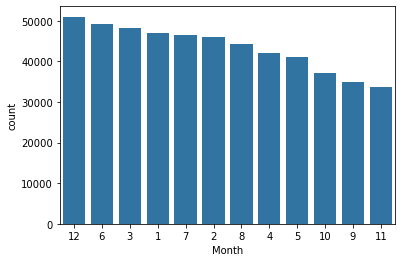

In [149]:
# Plot delays by month descending by delay quantity
freq = df_flights_delayed['Month'].value_counts()

# Get the indexes of the Series
gen_order = freq.index

# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
sb.countplot(data=df_flights_delayed, x='Month', color=base_color, order=gen_order);

#### Observation:
> As expected the winter months are amongst the months with the highest quantity of delays.  Note, if you're not from Chicago, know the March is basically an extension of winter.  :)

> Unexpectedly, the summer months show another peak in delays.  This could be due to the amount of people traveling in the summer for vacation, summer weather (thunderstorms, a combination of both or another reason all together.

#### Take a look at counts of delays by Period of Day

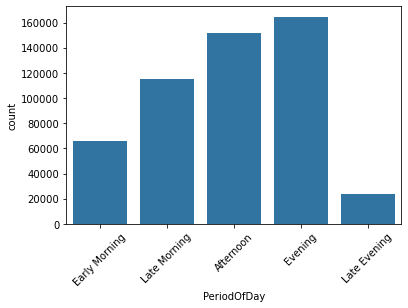

In [150]:
# Plot delays by month
gen_order = ['Early Morning', 'Late Morning', 'Afternoon', 'Evening', 'Late Evening']
sb.countplot(data=df_flights_delayed, x='PeriodOfDay', color=base_color, order=gen_order)
plt.xticks(rotation=45);

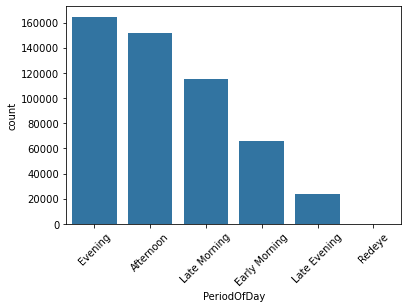

In [151]:
# Plot delays by month descending by delay quantity
freq = df_flights_delayed['PeriodOfDay'].value_counts()

# Get the indexes of the Series
gen_order = freq.index

# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
sb.countplot(data=df_flights_delayed, x='PeriodOfDay', color=base_color, order=gen_order)
plt.xticks(rotation=45);

#### Observation:
> The periods of the day with fewest delays are Early Morning and Late Evening, while the periods with the most delays are Evening & Afternoon.  This makes sense because there would tend to be fewer flights earl & late in the day and more fights in the middle of the day.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The delay time is severely right-skewed, which makes sense because most delays will only be 20-30 minutes.  It is very hard to see the tail of the data in the original histogram, so I applied a log scale.  After the log scale was applied the histogram remained right-skewed but the tail was much more visible and we can now see very few flights had delays longer than a couple of hours.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I applied relative proportion to see which carriers had the highest percentage of delayed flights.  Surprisingly, the carriers with the highest percentage of delay flights were those with the fewest departures from Oh'Hare.  Endeavor Air had the fewest departures and had 10% more of their flights than the United, the carrier with the most departures from O'Hare.

## Bivariate Exploration

In [152]:
variables = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'Month', 'CRSDepTime', 'DepDelay']

#### Use heat map to look at relationships between variables

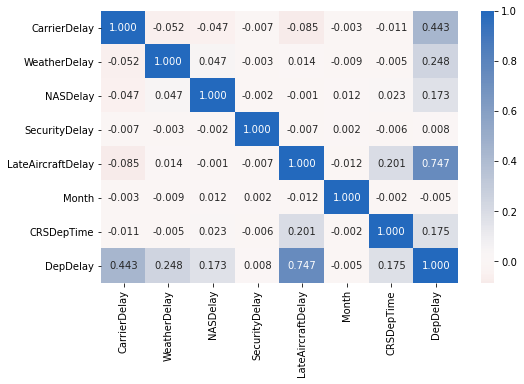

In [153]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df_flights_delayed[variables].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

#### Observation:
> There doesn't really appear to be much correlation in any of the data points I explored.  The only variables that correlate are the types of delays with Delayed Departures, which is to be expected because delays would lead to delayed departures.

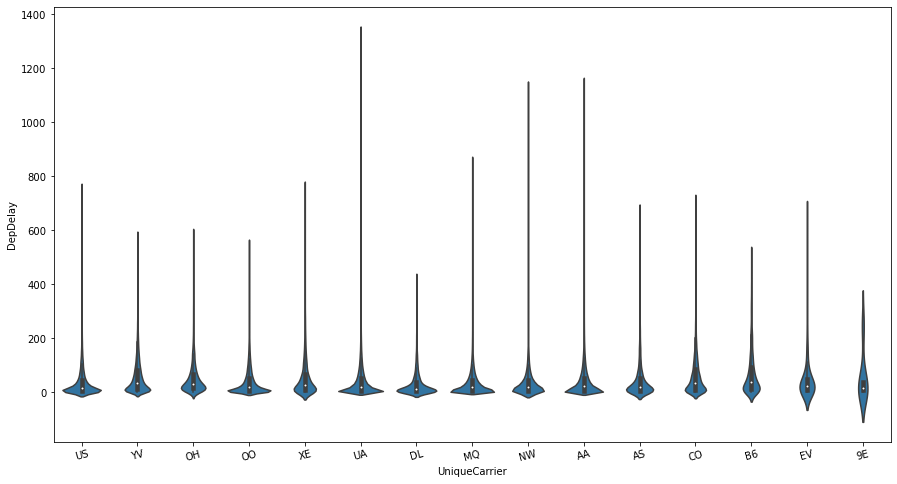

In [154]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [15, 8])
# The "inner" argument represents the datapoints in the violin interior. 
# It can take any value from {“box”, “quartile”, “point”, “stick”, None}
# If "box", it draws a miniature boxplot.
sb.violinplot(data=df_flights_delayed, x='UniqueCarrier', y='DepDelay', color=base_color, innner=None)
plt.xticks(rotation=15);

#### Observation:
> The shape of the violin plots suggest what we saw in our univariate exploration - most delays are of a shorter time frame.  However, the long tails for the different airlines suggest there are infrequent delays that last several hours with some airlines having longer max delays than other.

Let's put the same data in a box plot next

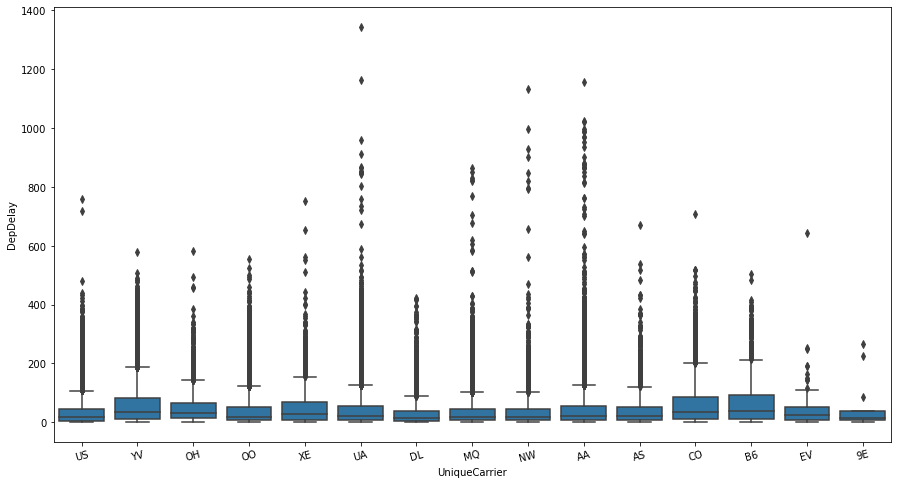

In [155]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [15, 8])

sb.boxplot(data=df_flights_delayed, x='UniqueCarrier', y='DepDelay', color=base_color)
plt.xticks(rotation=15);

#### Observation:
> The box plot prove our theory from the previous plot.  It's clear that the really long delays are infrequent with the average for each airline trending to shorting delays that last several minutes and the longer delays are mostly outliers. 

#### Take a look at the relationship between month of year and type of delay

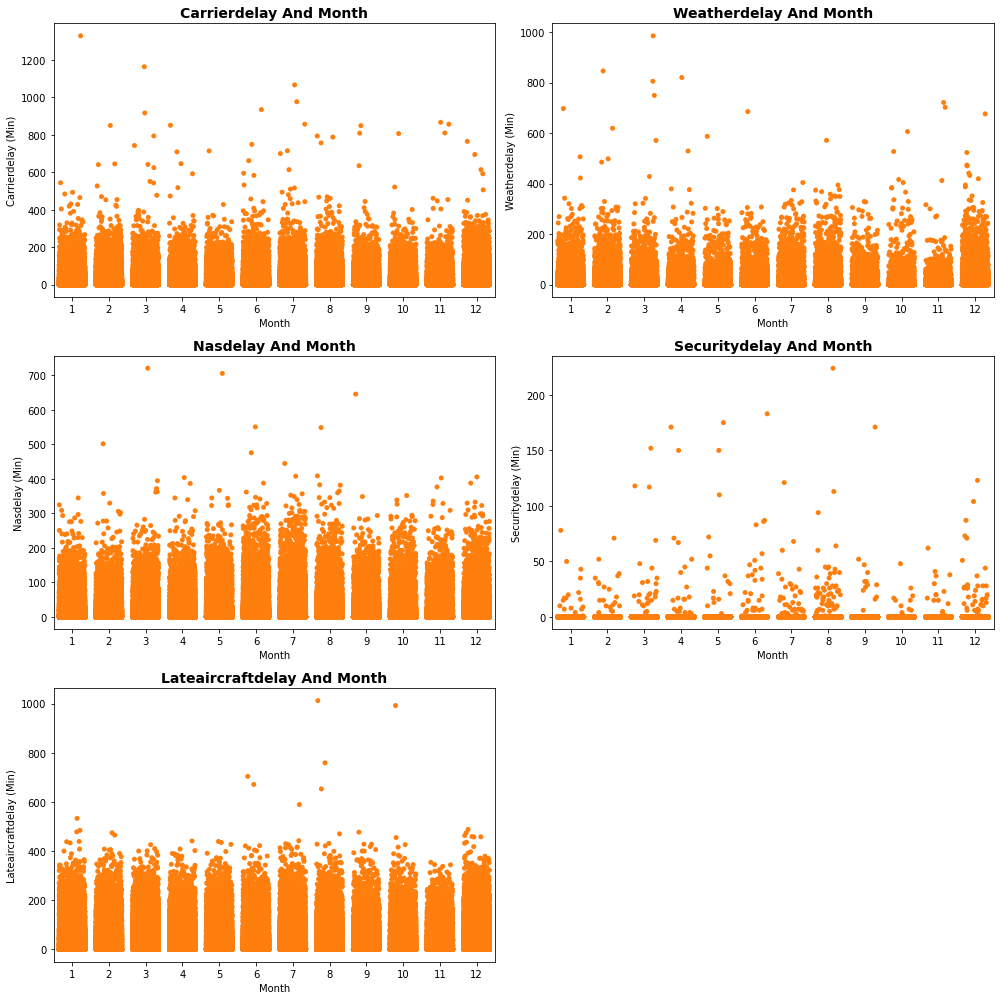

In [156]:
# Figure size
plt.figure(figsize = [14, 14])

# Figure color
base_color = sb.color_palette()[1]

# Create plots
for ind, yvar in enumerate (['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']):
    plt.subplot(3, 2, ind+1)
    StripPlot(df_flights_delayed, 'Month', yvar, color = base_color)

# optimize distance between plots
plt.tight_layout()

#### Observation:
> The relationship between month and length of delay broken out by type is fairly consistent with the exception of Security Delays, which a very short when compared to other types of delays.  However, if we look back at previous charts we can see there are very few Security Delays.

> We also see the length of Weather Delay spike a little in the winter months, which we expected to see.

#### Look at the relationship between carrier and type of delay

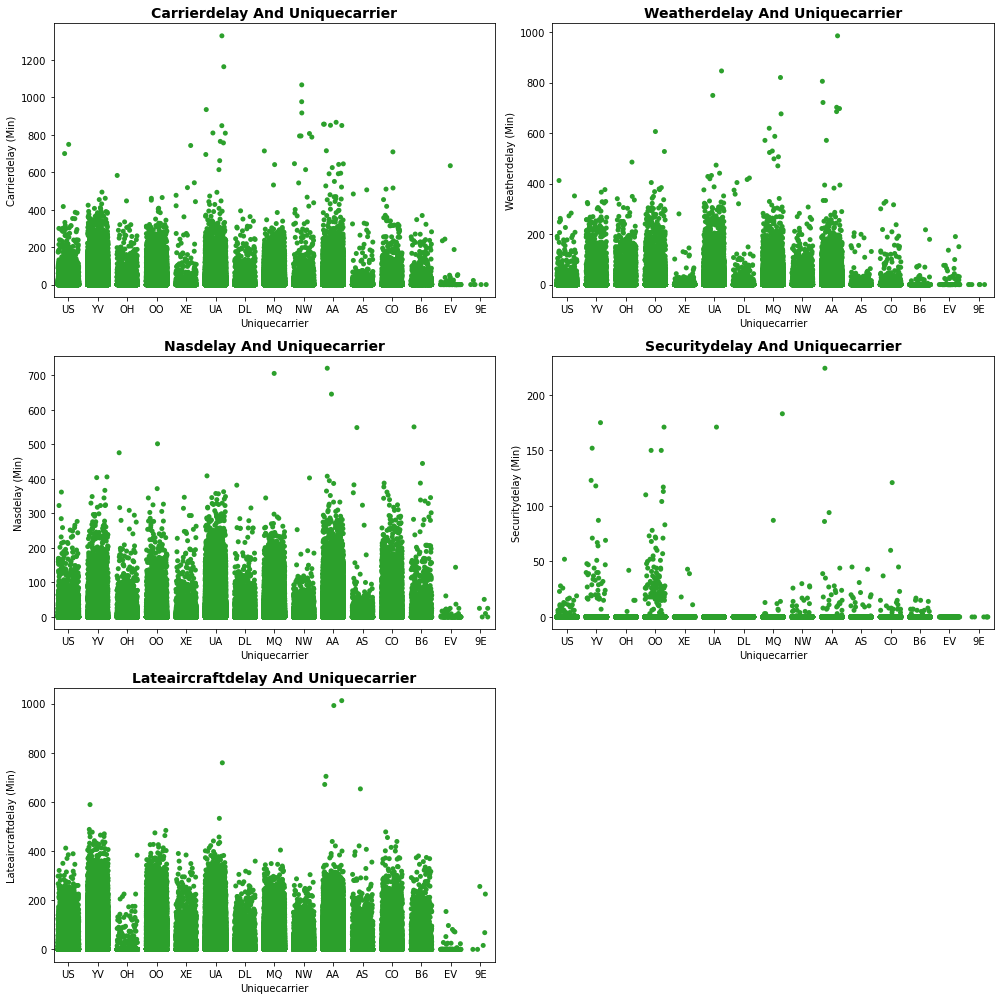

In [157]:
# Figure size
plt.figure(figsize = [14, 14])

# Figure color
base_color = sb.color_palette()[2]

# Create plots
for ind, yvar in enumerate (['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']):
    plt.subplot(3, 2, ind+1)
    StripPlot(df_flights_delayed, 'UniqueCarrier', yvar, color = base_color)

# optimize distance between plots
plt.tight_layout()

#### Observation:
> Plotting type of delay in minutes against the carrier shows some interesting points.  Looking at Carrier & Late Aircraft Delay we can see some carriers have more lengthy delays that others.

> Interestingly, it does not appear weather delays effect all airlines equally.  There are several airlines whose delay time is much lower than the rest.  One would expect the weather to affect all airlines equally. United (UA) and American (AA) appear to be the airlines most affected by weather delays.

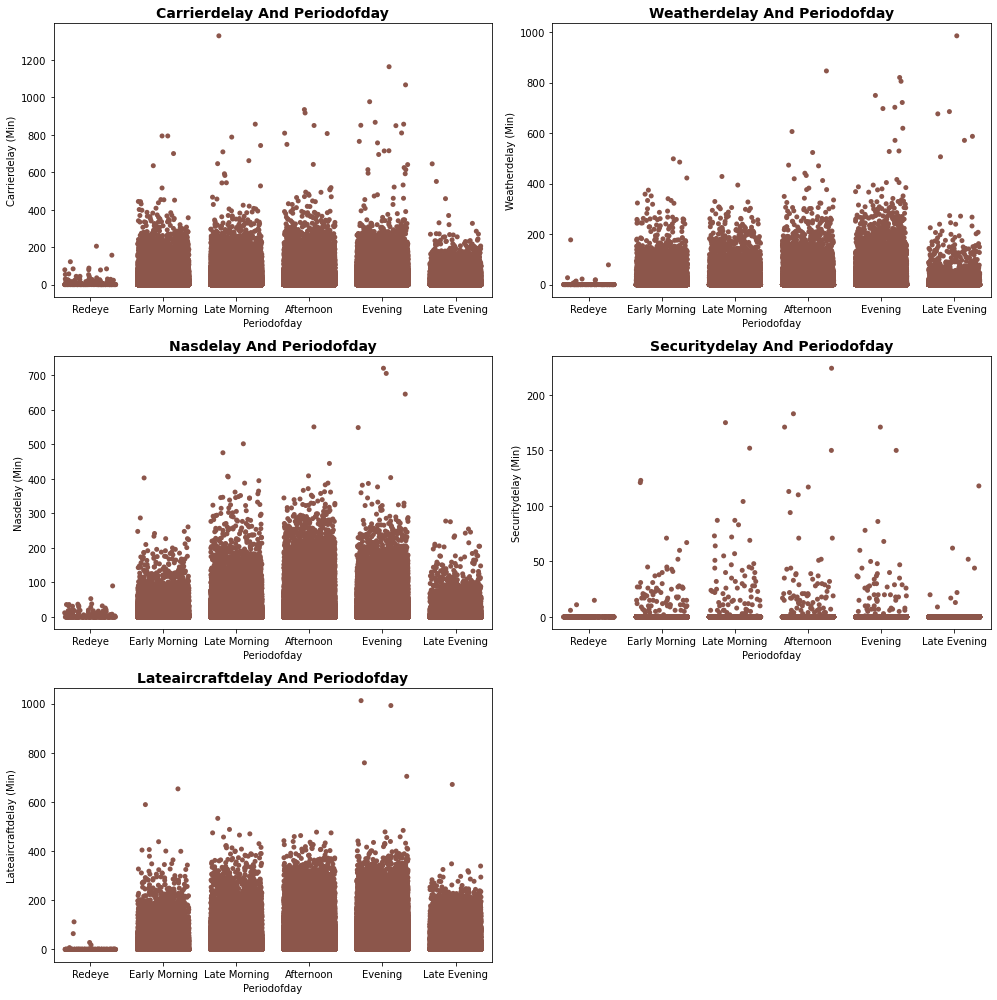

In [158]:
# Figure size
plt.figure(figsize = [14, 14])

# Figure color
base_color = sb.color_palette()[5]

# Create plots
for ind, yvar in enumerate (['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']):
    plt.subplot(3, 2, ind+1)
    StripPlot(df_flights_delayed, 'PeriodOfDay', yvar, color = base_color)

# optimize distance between plots
plt.tight_layout()

#### Observation
> The longest Carrier and Weather delays tend happen in the evenings.  The longest NAS and Late Aircraft delays happen during peak time periods.  Overall the 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> As expected, the lengthiest weather delays are occurring during the winter months in Chicago.  NAS Delays seems to affect the larger airlines over the smaller.  Airlines like United, American, and Mesa have the lengthiest delays due to NAS.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> One odd thing that stood out is, although we don't see a lot of Security Delays, a few airlines tend to be more negatively affected by it than others.

## Multivariate Exploration

In order to reduce clutter on charts, I will be looking at the top 5 air carriers in this section

In [159]:
value_list = ['UA', 'MQ', 'AA', 'OO', 'YV']
boolean_series = df_flights_delayed.UniqueCarrier.isin(value_list)
df_delay_5 = df_flights_delayed[boolean_series]

#### Examine top 5 carriers performance against month and type of delay

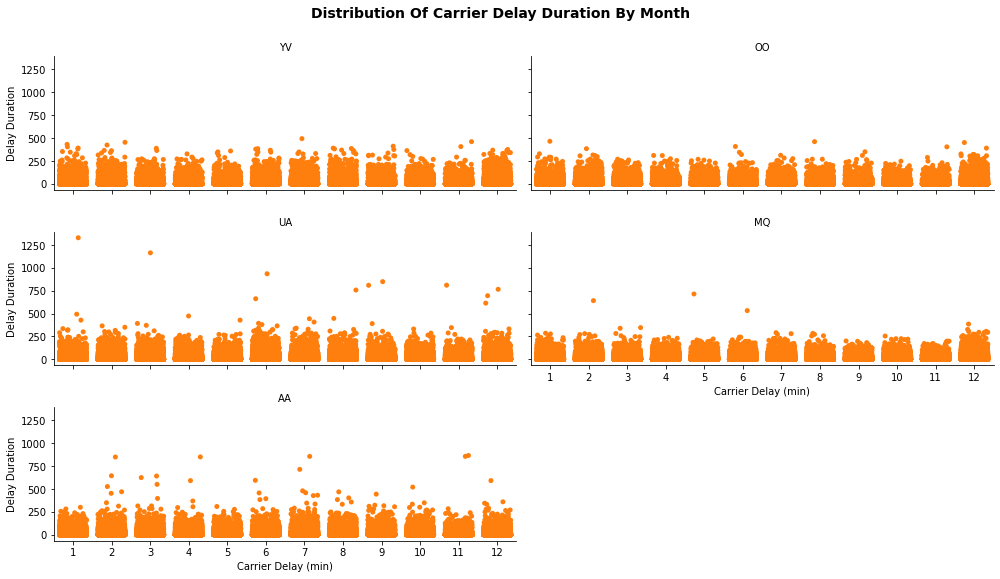

In [160]:
# Set Color
color = sb.color_palette()[1]

# Set column order
order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Plot
g = sb.FacetGrid(data = df_delay_5, col = 'UniqueCarrier', height = 4, margin_titles = True, col_wrap = 2)
g.map(sb.stripplot, 'Month', 'CarrierDelay', orient = 'v', jitter = 0.35, color = color, order = order)

# Axis labels
g.set_axis_labels(x_var = 'Carrier Delay (min)', y_var = 'Delay Duration')

# Chart title
g.set_titles('{col_name}');

# If visualizatin has subplots, add main title
plt.suptitle('Distribution of Carrier Delay Duration by Month'.title(), y = 1, fontsize = 14, weight = 'bold')

# Set plot dimensions
g.fig.set_size_inches(14,8)

# Optimize distance between plots
plt.tight_layout()

#### Observation:
> The top 5 airlines trend pretty consistently across months, but United (UA) and American (AA) have the lengthiest Carrier delays.

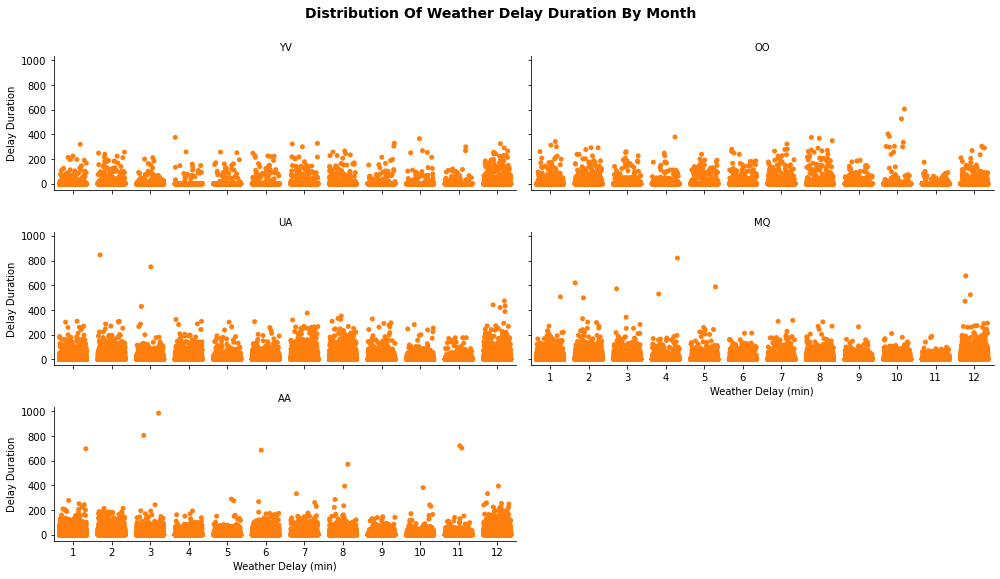

In [161]:
# Set Color
color = sb.color_palette()[1]

# Set column order
order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Plot
g = sb.FacetGrid(data = df_delay_5, col = 'UniqueCarrier', height = 4, margin_titles = True, col_wrap = 2)
g.map(sb.stripplot, 'Month', 'WeatherDelay', orient = 'v', jitter = 0.35, color = color, order = order)

# Axis labels
g.set_axis_labels(x_var = 'Weather Delay (min)', y_var = 'Delay Duration')

# Chart title
g.set_titles('{col_name}');

# If visualizatin has subplots, add main title
plt.suptitle('Distribution of Weather Delay Duration by Month'.title(), y = 1, fontsize = 14, weight = 'bold')

# Set plot dimensions
g.fig.set_size_inches(14,8)

# Optimize distance between plots
plt.tight_layout()

#### Observation:
> Again, we're seeing the top 5 airlines trend consistently for each.  We're seeing Envoy Air (MG) and American (AA) with the lengthiest delays due to weather.

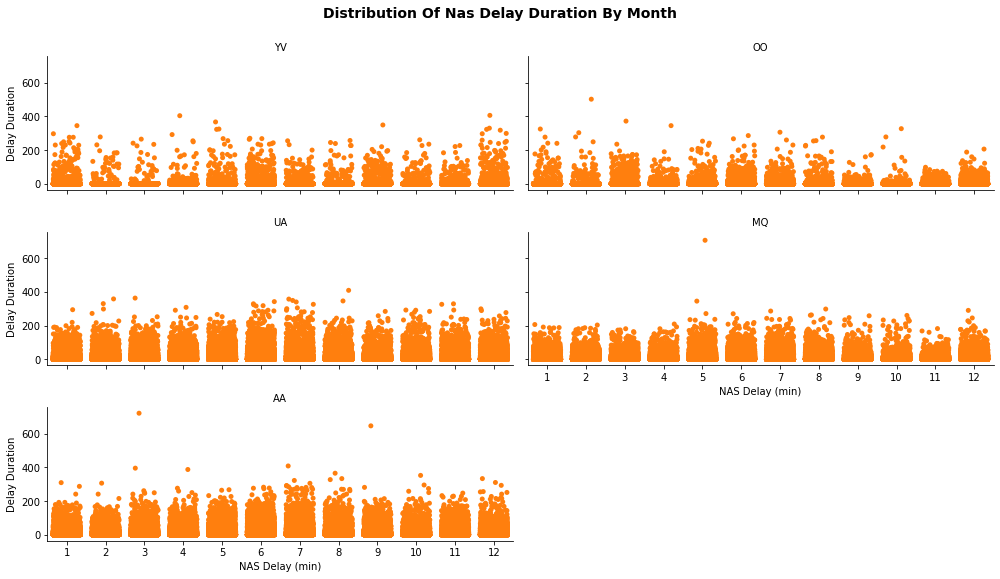

In [162]:
# Set Color
color = sb.color_palette()[1]

# Set column order
order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Plot
g = sb.FacetGrid(data = df_delay_5, col = 'UniqueCarrier', height = 4, margin_titles = True, col_wrap = 2)
g.map(sb.stripplot, 'Month', 'NASDelay', orient = 'v', jitter = 0.35, color = color, order = order)

# Axis labels
g.set_axis_labels(x_var = 'NAS Delay (min)', y_var = 'Delay Duration')

# Chart title
g.set_titles('{col_name}');

# If visualizatin has subplots, add main title
plt.suptitle('Distribution of NAS Delay Duration by Month'.title(), y = 1, fontsize = 14, weight = 'bold')

# Set plot dimensions
g.fig.set_size_inches(14,8)

# Optimize distance between plots
plt.tight_layout()

#### Observation: 
> Most carriers follow the same rise and fall each month, except for United (UA).  There is a small spike in June and July for United.

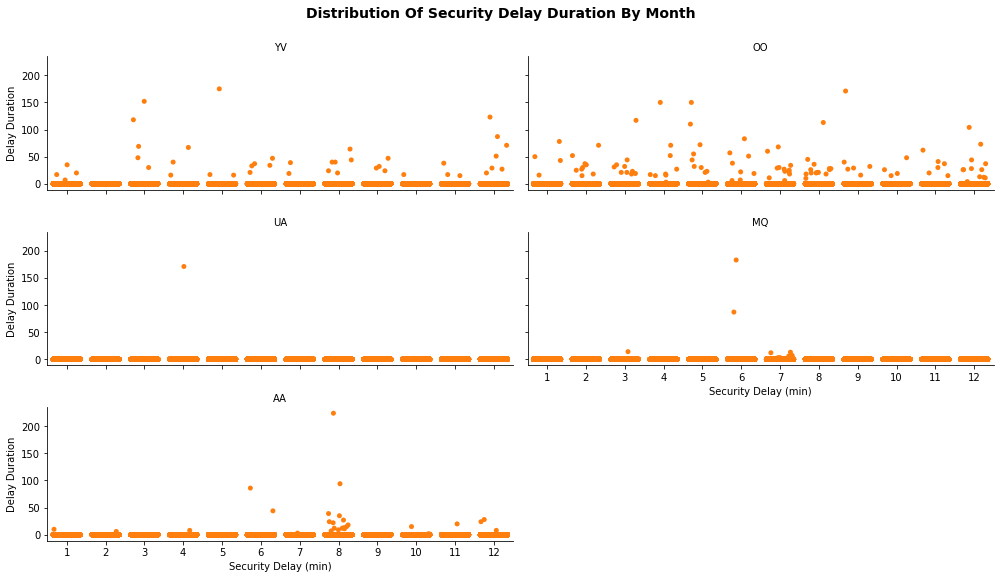

In [163]:
# Set Color
color = sb.color_palette()[1]

# Set column order
order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Plot
g = sb.FacetGrid(data = df_delay_5, col = 'UniqueCarrier', height = 4, margin_titles = True, col_wrap = 2)
g.map(sb.stripplot, 'Month', 'SecurityDelay', orient = 'v', jitter = 0.35, color = color, order = order)

# Axis labels
g.set_axis_labels(x_var = 'Security Delay (min)', y_var = 'Delay Duration')

# Chart title
g.set_titles('{col_name}');

# If visualizatin has subplots, add main title
plt.suptitle('Distribution of Security Delay Duration by Month'.title(), y = 1, fontsize = 14, weight = 'bold')

# Set plot dimensions
g.fig.set_size_inches(14,8)

# Optimize distance between plots
plt.tight_layout()

#### Observation:
> There a very few points of reference for Security Delay, but only Mesa (YV) and Skywest (OO) see any significant delays.  The delays seem to pretty consistent with those airlines and most months see at least a moderate delay due to Security.

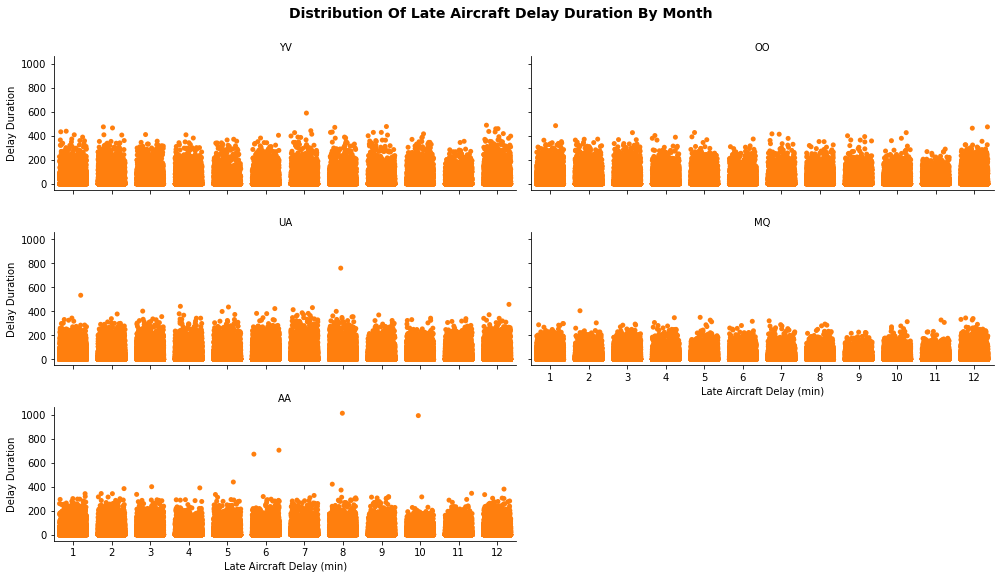

In [164]:
# Set Color
color = sb.color_palette()[1]

# Set column order
order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Plot
g = sb.FacetGrid(data = df_delay_5, col = 'UniqueCarrier', height = 4, margin_titles = True, col_wrap = 2)
g.map(sb.stripplot, 'Month', 'LateAircraftDelay', orient = 'v', jitter = 0.35, color = color, order = order)

# Axis labels
g.set_axis_labels(x_var = 'Late Aircraft Delay (min)', y_var = 'Delay Duration')

# Chart title
g.set_titles('{col_name}');

# If visualizatin has subplots, add main title
plt.suptitle('Distribution of Late Aircraft Delay Duration by Month'.title(), y = 1, fontsize = 14, weight = 'bold')

# Set plot dimensions
g.fig.set_size_inches(14,8)

# Optimize distance between plots
plt.tight_layout()

#### Observation:
> We see most of the air carriers following a similar curve of increased delays in the winters months and decreasing delays in the summer months, except for United (UA).  United is seeing increased delays in the summer months due to Air Carrier delay.

#### Examine top 5 carriers performance against period of day and type of delay for each delay category

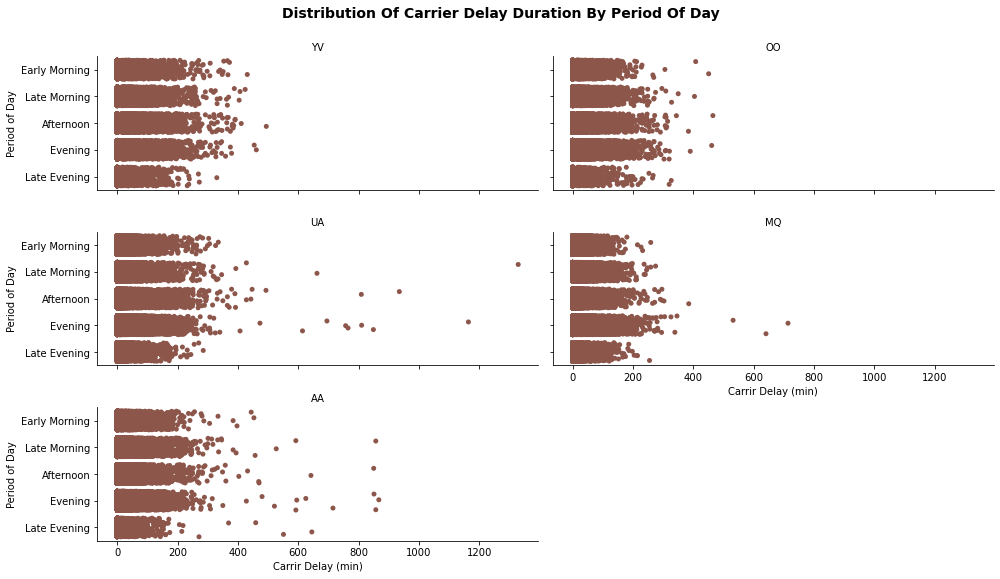

In [165]:
# Set Color
color = sb.color_palette()[5]

# Set column order
order = ['Early Morning', 'Late Morning', 'Afternoon', 'Evening', 'Late Evening']

# Plot
g = sb.FacetGrid(data = df_delay_5, col = 'UniqueCarrier', height = 4, margin_titles = True, col_wrap = 2)
g.map(sb.stripplot, 'CarrierDelay', 'PeriodOfDay', orient = 'h', jitter = 0.35, color = color, order = order)

# Axis labels
g.set_axis_labels(x_var = 'Carrir Delay (min)', y_var = 'Period of Day')

# Chart title
g.set_titles('{col_name}');

# If visualizatin has subplots, add main title
plt.suptitle('Distribution of Carrier Delay Duration by Period of Day'.title(), y = 1, fontsize = 14, weight = 'bold')

# Set plot dimensions
g.fig.set_size_inches(14,8)

# Optimize distance between plots
plt.tight_layout()

#### Observation:
> Here, the most noticeable attribute is the spoke in delays for United (UA) in the afternoon.  American also sees a spike, but the delays aren't as long.  

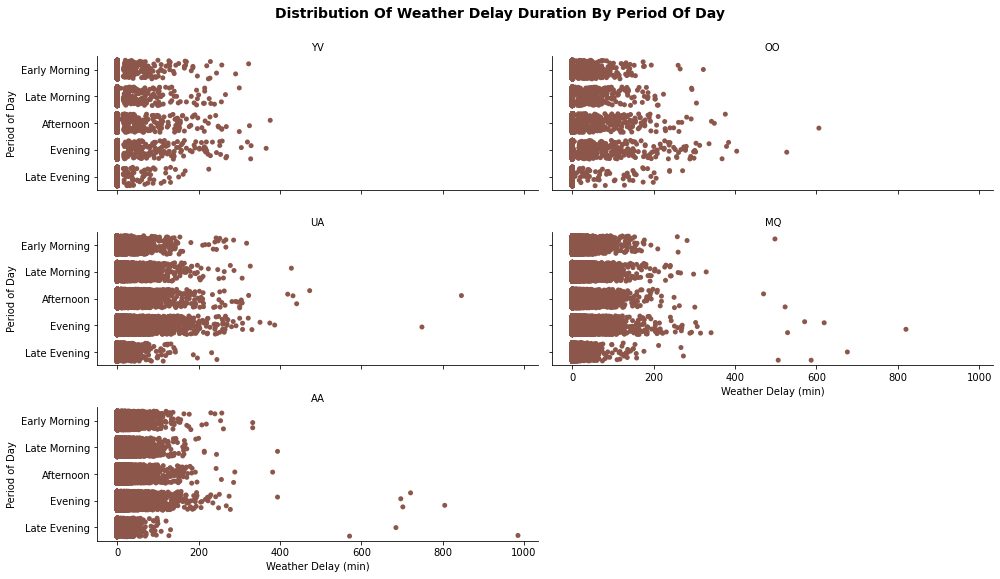

In [166]:
# Set Color
color = sb.color_palette()[5]

# Set column order
order = ['Early Morning', 'Late Morning', 'Afternoon', 'Evening', 'Late Evening']

# Plot
g = sb.FacetGrid(data = df_delay_5, col = 'UniqueCarrier', height = 4, margin_titles = True, col_wrap = 2)
g.map(sb.stripplot, 'WeatherDelay', 'PeriodOfDay', orient = 'h', jitter = 0.35, color = color, order = order)

# Axis labels
g.set_axis_labels(x_var = 'Weather Delay (min)', y_var = 'Period of Day')

# Chart title
g.set_titles('{col_name}');

# If visualizatin has subplots, add main title
plt.suptitle('Distribution of Weather Delay Duration by Period of Day'.title(), y = 1, fontsize = 14, weight = 'bold')

# Set plot dimensions
g.fig.set_size_inches(14,8)

# Optimize distance between plots
plt.tight_layout()

#### Observation:
> Weather delays seem to effect all air carriers about the same.  The longest delay is almost the same with a few airlines have some extremely long delays.

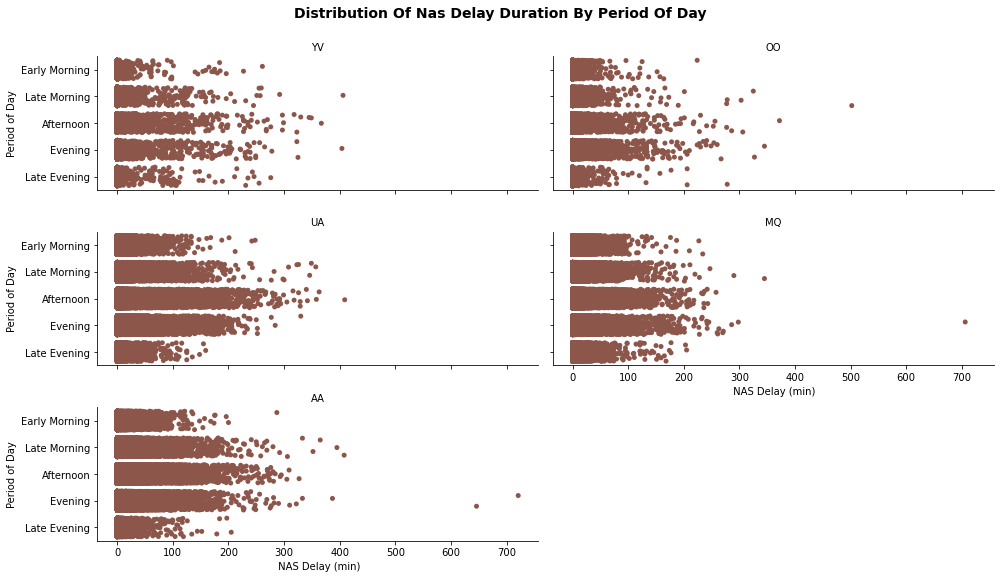

In [167]:
# Set Color
color = sb.color_palette()[5]

# Set column order
order = ['Early Morning', 'Late Morning', 'Afternoon', 'Evening', 'Late Evening']

# Plot
g = sb.FacetGrid(data = df_delay_5, col = 'UniqueCarrier', height = 4, margin_titles = True, col_wrap = 2)
g.map(sb.stripplot, 'NASDelay', 'PeriodOfDay', orient = 'h', jitter = 0.35, color = color, order = order)

# Axis labels
g.set_axis_labels(x_var = ' NAS Delay (min)', y_var = 'Period of Day')

# Chart title
g.set_titles('{col_name}');

# If visualizatin has subplots, add main title
plt.suptitle('Distribution of NAS Delay Duration by Period of Day'.title(), y = 1, fontsize = 14, weight = 'bold')

# Set plot dimensions
g.fig.set_size_inches(14,8)

# Optimize distance between plots
plt.tight_layout()

#### Observation:
> For the most part, NAS delays effect all airlines equally throughout the day, but there are some exceptions.  United (UA)see longer delays in the early morning compared to other and American (AA) sees longer delays Late Morning with some really long delays in the Evening.

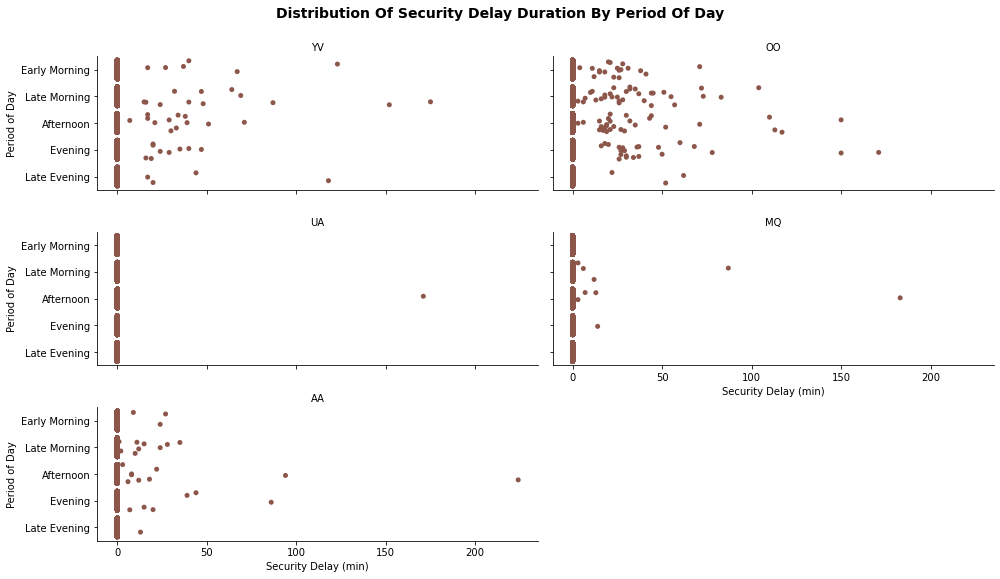

In [168]:
# Set Color
color = sb.color_palette()[5]

# Set column order
order = ['Early Morning', 'Late Morning', 'Afternoon', 'Evening', 'Late Evening']

# Plot
g = sb.FacetGrid(data = df_delay_5, col = 'UniqueCarrier', height = 4, margin_titles = True, col_wrap = 2)
g.map(sb.stripplot, 'SecurityDelay', 'PeriodOfDay', orient = 'h', jitter = 0.35, color = color, order = order)

# Axis labels
g.set_axis_labels(x_var = 'Security Delay (min)', y_var = 'Period of Day')

# Chart title
g.set_titles('{col_name}');

# If visualizatin has subplots, add main title
plt.suptitle('Distribution of Security Delay Duration by Period of Day'.title(), y = 1, fontsize = 14, weight = 'bold')

# Set plot dimensions
g.fig.set_size_inches(14,8)

# Optimize distance between plots
plt.tight_layout()

#### Observation:
> Similar to what we saw in the monthly breakdown in the previous section, Mesa (YV) and Skywest (OO) are impacted more by Security delays than other airlines.  Late Morning is the period with longest delays.

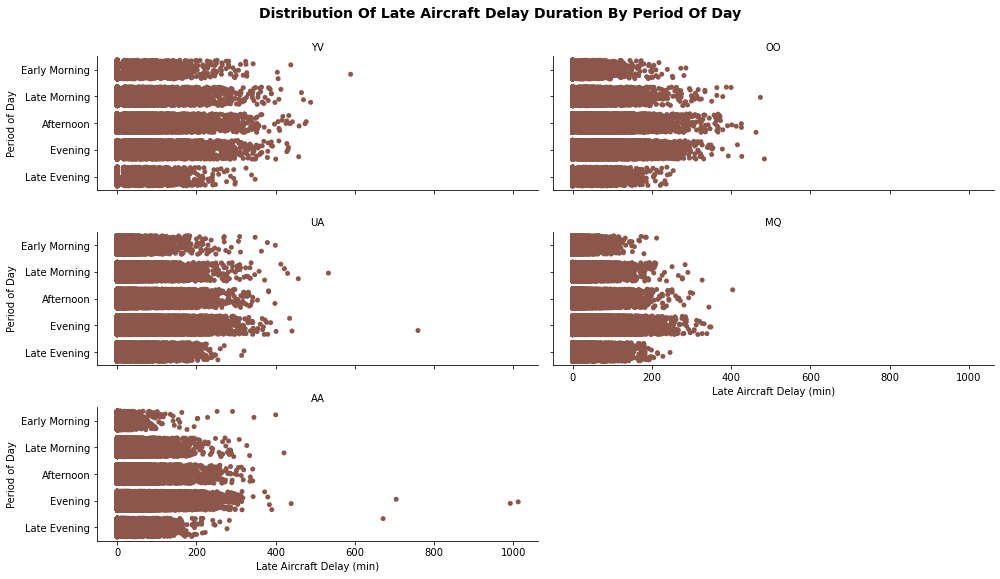

In [170]:
# Set Color
color = sb.color_palette()[5]

# Set column order
order = ['Early Morning', 'Late Morning', 'Afternoon', 'Evening', 'Late Evening']

# Plot
g = sb.FacetGrid(data = df_delay_5, col = 'UniqueCarrier', height = 4, margin_titles = True, col_wrap = 2)
g.map(sb.stripplot, 'LateAircraftDelay', 'PeriodOfDay', orient = 'h', jitter = 0.35, color = color, order = order)

# Axis labels
g.set_axis_labels(x_var = 'Late Aircraft Delay (min)', y_var = 'Period of Day')

# Chart title
g.set_titles('{col_name}');

# If visualizatin has subplots, add main title
plt.suptitle('Distribution of Late Aircraft Delay Duration by Period of Day'.title(), y = 1, fontsize = 14, weight = 'bold')

# Set plot dimensions
g.fig.set_size_inches(14,8)

# Optimize distance between plots
plt.tight_layout()

#### Observation:
> Envoy (MQ) looks like to have shorter delays due to late Aircraft than other carriers across all time periods.  The other carriers appear to be effected about the same for each time period - with American (AA) see a few really long delays in the evening.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I set out to identify if any of the top 5 (by departure count) had longer delays by month or period of the day.  Overall, each airline's delay time was about the same for each type of delay and month or period of day.  There are a few exceptions like Security delays impacting two of the airlines more, but overall each type of delay led to about the same length no matter the airline.

### Were there any interesting or surprising interactions between features?

> I thought it was surprising that airlines were all affected about the same by each type of delay, no matter the period of the day or month.  I expected to see some airlines outperform others, but overall, the length of delays was about the same with a few instances of extreme delay lengths dispersed throughout the data.